This notebook is part of the various tests for scimap. It's intended to allow for visual evaluation of fits, etc.

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
# plt.xkcd()
import pandas as pd
import scimap
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Prepare HDF File for Later Unit Tests


In [ ]:
scimap.import_aps_34IDE_map(
    directory="test-data-xrd/xrd-map-34-ID-E/",
    wavelength=0.4959,
    shape=scimap.shape(rows=13, columns=11),
    step_size=scimap.default_units.um(1),                      
    beamstop=0.49,                            
    hdf_filename="test-data-xrd/xrd-map-34-ID-E.hdf"
);

# Corundum

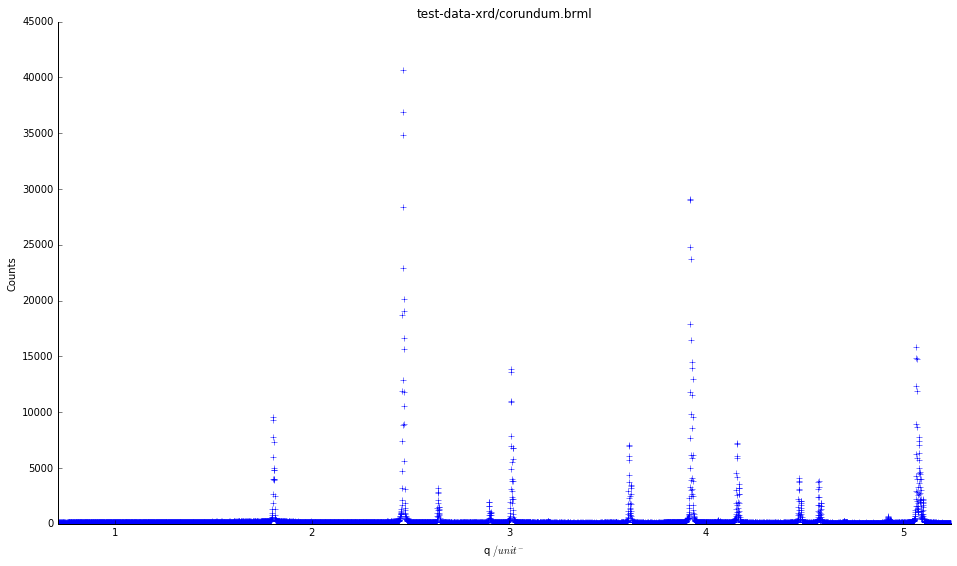

In [14]:
corundum_scan = scimap.XRDScan(filename="test-data-xrd/corundum.brml")
corundum_scan.plot_diffractogram()

## Remove a Peak

5404 5404


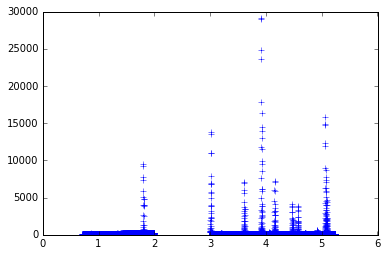

In [12]:
q, y = scimap.remove_peak_from_df(x=corundum_scan.scattering_lengths,
                          y=corundum_scan.intensities,
                          xrange=(2, 3))
print(len(q), len(y))
plt.plot(q, y, marker='+', linestyle="None")

## Peak Fitting

In [18]:
# Converted old unit-test angles to q
celref_peaks = [
            ('012', 3.4746228816945104, 25.637288649553085),
            ('104', 2.5479680737754244, 35.22223164557721),
            ('110', 2.375, 37.88141047624646),
            ('006', 2.1636666666666664, 41.74546075011751),
            ('113', 2.0820345582756135, 43.46365474219995),
            ('024', 1.7373114408472552, 52.68443192186963),
            ('116', 1.5994489779586798, 57.62940019834231),
]
two_theta = np.array([p[2] for p in celref_peaks])
scimap.twotheta_to_q(two_theta, scimap.tubes['Cu'].kalpha.num)

array([ 1.80822894,  2.46585258,  2.64543732,  2.90382698,  3.0176798 ,
        3.61645787,  3.92817384])

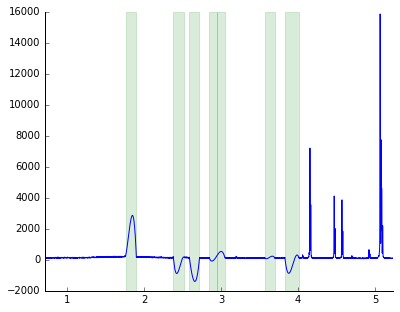

In [19]:
# Plot fitting for a peak
scan = scimap.XRDScan(filename="test-data-xrd/corundum.brml",
                     phase=scimap.standards.Corundum())
df = scan.diffractogram
scan.refinement.fit_peaks(scattering_lengths=df.index, 
                          intensities=df['subtracted'])
scan.refinement.plot(df.index)

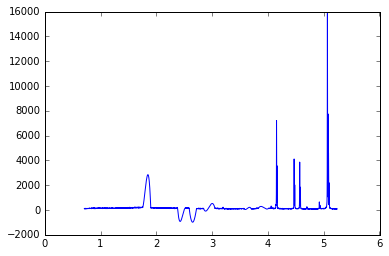

In [25]:
scan = scimap.XRDScan(filename="test-data-xrd/corundum.brml",
                     phase=scimap.standards.Corundum())
plt.plot(scan.scattering_lengths, scan.background())